*17.10.2024 *- IGU MYO BILGISAYAR TEKNOLOJISI PROGRAMI AI DERSI (3.Hafta )



In [1]:
import sys
print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/My Drive/Ai_Ders_IGU_2024')
!pwd

/content/drive/My Drive/Ai_Ders_IGU_2024


# <>BeautifulSoup

In [48]:
import requests
from bs4 import BeautifulSoup ## -- BeautifulSoup: python tabanlı web scraping kütüphanelerinden birisidir. html parser bulundurur ve bu parser metodları üzerinden html içeriğindeki spesifik konumlara erişmemizi sağlar.

In [49]:
url = 'https://www.add.org.tr/ataturk/genclige-hitabe/' ## -- erişilmek istenen web sayfasının URL'sini tanımlar.
response = requests.get(url) ## -- Belirtilen URL'ye bir HTTP GET isteği gönderir. Yanıt olarak web sayfasının içeriğini (HTML) alır ve response değişkeninde saklar.
soup = BeautifulSoup(response.content, 'html.parser') ## -- HTML içeriğini BeautifulSoup kütüphanesi ile işler, sayfanın yapısını analiz etmemizi ve içindeki verilere daha kolay erişmemizi sağlar.

In [50]:
if response.status_code == 200: ## -- HTTP yanıt durum kodunu kontrol eder. Ve web sayfası başarıyla erişilmiştir.
    soup = BeautifulSoup(response.content, 'html.parser')

    for heading in soup.find_all(['h1', 'h2', 'h3']): ## -- Sayfadaki tüm başlık etiketlerini (<h1>, <h2>, <h3>) bulur ve döngüye alır.
        print(heading.text.strip())
else: ## -- else durumunda : Bağlantının başarısız olduğunu ve durum kodunu ekrana yazdırır.
    print("Connection failed : ", response.status_code)

ATATÜRK'ÜN GENÇLİĞE HİTABESİ


In [40]:
import requests
from bs4 import BeautifulSoup

In [52]:
url = 'https://www.add.org.tr/ataturk/genclige-hitabe/'

response = requests.get(url) ## -- Belirtilen URL'ye  HTTP[GET] isteği gönderir ve yanıtı alır.

if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')

    links = soup.find_all('a') ## -- Sayfadaki a etiketlerini ve  bağlantıları bulur ve <links> listesine kaydeder.

    for link in links:
        href = link.get('href')
        text = link.text.strip()
        if href:
            print("Link text :  ", text, "URL:", href)
    print("Total number of information :  ", len(links))
else:
    print("Link failed : ", response.status_code)

Link failed :  403


In [53]:
!pip install opencv-python-headless
## -- OpenCV'nin GUI (grafik kullanıcı arayüzü) bileşenleri içermeyen bir versiyonudur.
## -- "Headless" terimi, grafiksel arayüz olmadan çalışabilen bir sürümü ifade eder.
## -- Bu sürüm, sunucu veya bulut ortamlarında, görsel arayüze ihtiyaç duyulmadan kullanılmak üzere tasarlanmıştır. (chatGPT)

In [72]:
import os
import cv2 ## -- OpenCV kütüphanesini içe aktarır.
import matplotlib.pyplot as plt ## -- pyplot, grafik, veri görselleştirme için kullanılan bir kütüphanedir. Verileri çizmek, grafikler oluşturmak ve görselleştirmek için kullanılır.

In [89]:
folder_path = '/content/drive/My Drive/Ai_Ders_IGU_2024/pictures' ## -- collab resim dosyasının yolu

In [90]:
## -- resim formatları belirtiliyor.
pic_formats = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')

In [91]:
## -- klasördeki resim dosyalarını listeleme
islenen_bilgi = [f for f in os.listdir(folder_path) if f.lower().endswith(pic_formats)]

## -- Resim dosyalarının ismlerini listeleme ve sayısı
print("There are ", len(islenen_bilgi), "picture.")

print(" - Names and file extensions of image files") ## -- Resim adları ve dosya uzantıları
for i in islenen_bilgi:
    print(i)

There are  11 picture.
 - Names and file extensions of image files
python2.png
python.png
python3.png
pythonopencvrenkli.png
trafik-1.png
trafik-2.png
trafik-3.png
siberakademi_banner.png
Ataturk.jpg
Ataturk-1.png
ataturk-2.jpg


## Görüntü işleme ve görüntüleme
(orijinal görüntü, bulanıklaştırma, gri tona çevirme, kenar algılama)

### Orijinal Görüntü Yükleme ve Gösterme

In [92]:
## -- 1. aşama : Görüntüyü İşleme
image = cv2.imread('pictures/ataturk-2.jpg')

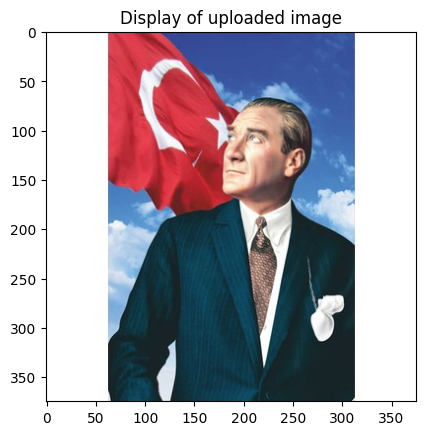

In [93]:
## -- Görüntüyü Görüntüleme
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Display of uploaded image")
plt.show()

### Görüntüyü gri tonlamaya çevirme

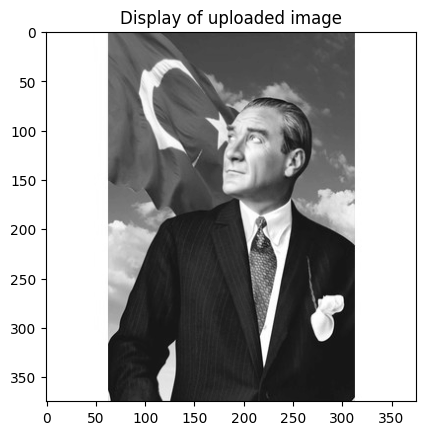

In [94]:
# 2. aşama : Görüntüyü gri tonlamaya çevirme
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## -- Gri tonlanmış görüntüyü gösterme
plt.imshow(gray_image , cmap = 'gray')
plt.title("Display of uploaded image")
plt.show()

### Görüntüyü bulanıklaştırma

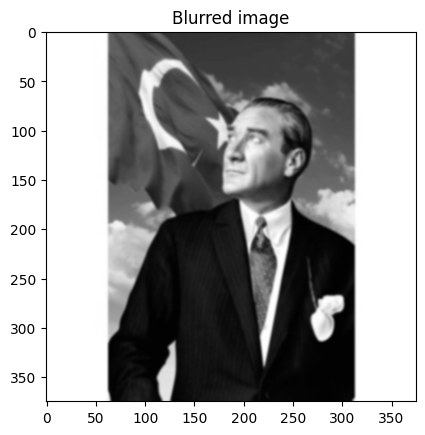

In [95]:
# 3. aşama  : görüntüyü bulanıklaştırma
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

## -- Bulanıklaştırılmış görüntüyü gösterme
plt.imshow(blurred_image, cmap = 'gray')
plt.title("Blurred image")
plt.show()

### Kenar Algılama

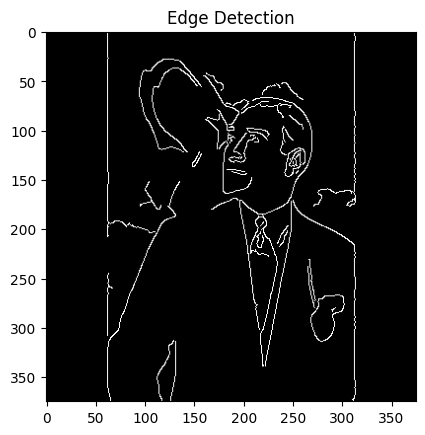

In [96]:
# 4. aşama : Kenar Algılama
edges = cv2.Canny(blurred_image, threshold1=100, threshold2=200)

plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.show()

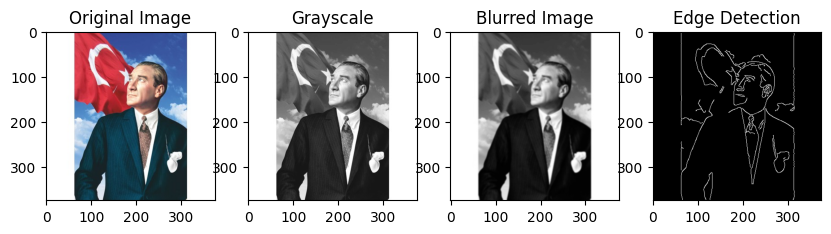

In [97]:

plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 4, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale")

plt.subplot(1, 4, 3)
plt.imshow(blurred_image, cmap='gray')
plt.title("Blurred Image")

plt.subplot(1, 4, 4)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")

plt.show()

resim link : https://images.app.goo.gl/Tqms2LPGZFtgrmH26

<< **cv2.COLOR_GRAY2GBR**: *Gri tonlamadan BGR'ye dönüştürür* / sınavda çıkabilir. >>